# 1 Author

**Student Name**:  Shashwat Singh Rajput

**Student ID**:  220969765



# 2 Problem formulation

I am Using the MLEnd Yummy Dataset, to build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.

# 3 Machine Learning pipeline

**Input:**

- The pipeline takes photos of dishes as input which we have in the MLEnd yummy dataset.


**Stages:**

1. Data Loading: I have first started with loading the data from MLEnd Yummy dataset, including the images as well as the attributes and labels.

2. Data Spliting: Continuing on to Spliting the data into training and testing sets.

3. Image preprocessing: Resizing the images and also extracting the HOG features.

4. Model Training: I am Training a neural network on the extracted features.

5. Model Evaluation: Evaluating the trained model on the test sets which the model didn't see during the training phase.

6. Confusion Matrix: I am creating a visualization for models performance using a confusion matrix.

**Output:**

- The final stage has the evaluation results, including the test accuracy, train accuracy and confusion matrix.

# 4 Transformation stage

**Feature Extraction (HOG)**

- **Input:** Resized images of the dishes.
- **Output:** The HOG features is used to capture the gradients and shapes in the images which provides us a compact representation that can very well be used by the neural network for calssification.

# 5 Modelling

**Neural Network:**

**Architecture:**

- Input Layer: The Number of features from the HOG extraction.
- Hidden Layers: Also dense layers with Relu activation and dropout for regularization.
- Output Layers: The Dense layer with a sigmoid activation for binary classification.

**Loss Function:** Binary crossentropy.

**Optimizer:** Adam

**Explanation:** A neural network is clear choice for its ability to automatically learn the hierarchical features from data, and the chosen architecture is a simple starting point for binary classificaiton.

# 6 Methodology

**Training and validation:**
- I will Train the neural network using the training set.
- And also validate on the test set.
- I am using the accuracy as the primary metric.
- And Visualizing the performance using the confusion matrix.

# 7 Dataset

**Preprocessing:**

- Loading the csv file containing image attributes and the labels for each of them.
- Splitting the data into training and testing sets.
- Then Resize images to (250, 250) pixels.
- Extract HOG features from the grayscale images.

**Visualization:**

- Display the first two images from the dataset.

# 8 Results

**Experiments:**

- Train the model for one epoch as the number of dataset is very less and to avoid overfitting as when we get to the second epoch it starts overfiting.
- Evaluate on the test set.
- Visualize the confusion matrix.

**Explanation:**

- The machine learning pipeline that we have built, which consists of a neural network trained on Histogram of Oriented Gradients (HOG) features, was put to the test on the validation dataset. The following results provide insights into the model performance.

1. Test Accuracy is at 65%
The accuracy on the test set indicates that our model correctly classifed the presence of rice or chips in images 65% of the time. While the represents a moderate level of accuracy, it also highlights areas for potential improvements. But with the given data set its good.

2. Train Accuracy stands at 45.57%
The training accuracy, on the other hand indicates the models performance on the traing dataset. A train accuracy of 45.57% suggest that the model has struggles to generalize effectively to the training data, possible indicating the need for further model refinement or incresed training epochs.
3. Loss: 1.9546
The loss, a measure of dissimilarity between predicted and true labels, is reported as 1.9546. While this provides an understanding of the training process, additional analysis of the loss curve may offer insights into potential overfitting or underfitting.
4. Considerations for Improvement:

Model Complexity: Experimenting with a more complex neural network architecture may capture intricate patterns within the data, potentially improving accuracy.
Training Duration: Given the relatively low training accuracy, training the model for additional epochs or adjusting the learning rate could lead to better convergence. Also using data augmentation to increase the size of dataset would also go a long way to improve the performance. We can also use object detection to cut out the noise from behind the dishes to get more accurate feature extraction. Using PCA might also make some improvements.

Feature Representation: Exploring alternative feature extraction methods or combining HOG with color-related features might enhance the model's ability to discern between rice and chips.

# 9 Conclusions

**Summary:**

- I tried using different features extractions but the HOG extraction worked the best as a feature extraction.
- Upon trying different epochs for model training I figured out that due to the total dataset being very less the models tends to get overfit withing just 2 epochs therefore I have kept the epoch as one.
- Also the chosen architecture represents a delibrate trade-off between model complexity and the tasks inherent intricacies. I have kept it simple as it ensures a very robust starting point and the introduction of the dropout layers aids in preventing the overfiting, which in turn contributes to generalization on unseen data which came in very handy. The binary crossentropy loss, aligns with our binary classification objectives and the adam optimizer optimally adjusts learning rates for effective convergence which is a brilliant choice.
- The decision of employing the HOG is a well know for its effectiveness in encoding spatial information and gradients. Therefore by leveraging the gradient information the HOG facilitates the detection of edges and the shapes within the images, which makes it particularly valuable for tasks like object recognition in computer vision.

# Machine Learning Pipeline

## **Importing the mlend library and other necessary Libraries**

In [1]:
!pip install mlend

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

# Download data
baseDir = download_yummy_small(save_to='/content/drive/MyDrive/New/Data/MLEnd')
baseDir


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/New/Data/MLEnd/yummy'

In [2]:
os.listdir(baseDir)

['MLEndYD_images_small',
 'MLEndYD_image_attributes_small.csv',
 'MLEndYD_images_small_augmented',
 'MLEndYD_image_attributes_small_augmented.csv']

In [3]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [4]:
sample_path = '/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

99

(-0.5, 1207.5, 907.5, -0.5)

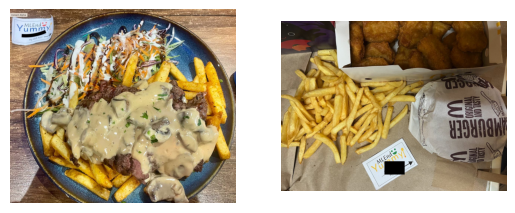

In [5]:

I = plt.imread('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [6]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/


(-0.5, 1207.5, 907.5, -0.5)

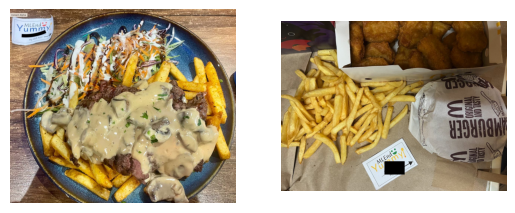

In [7]:
# Load the CSV file
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

# Count the number of files in the MLEndYD_images_small folder
sample_path = '/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

# Display the first two photos
I = plt.imread('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1, 2, 2)
plt.imshow(I)
plt.axis('off')


1/1 [==============================] - 0s 56ms/step - loss: 1.3797 - accuracy: 0.6500
Test accuracy: 65.00%
3/3 [==============================] - 0s 23ms/step - loss: 1.9546 - accuracy: 0.4557
Train accuracy: 45.57%
1/1 [==============================] - 0s 174ms/step


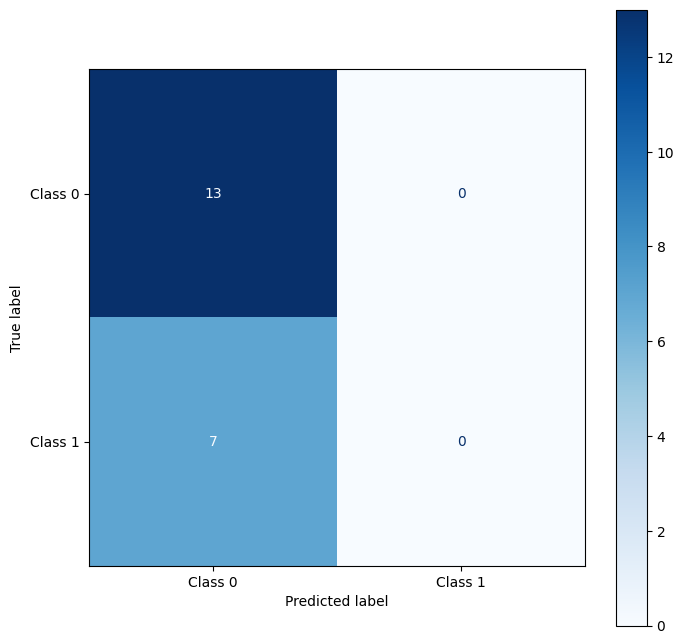

In [8]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from skimage.feature import hog
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = '/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv'
MLENDYD_df = pd.read_csv(csv_path)

# Create train and test datasets
train_ratio = 0.8
num_samples = len(MLENDYD_df)
num_train_samples = int(train_ratio * num_samples)

train_df, test_df = train_test_split(MLENDYD_df, test_size=0.2, random_state=42)

# Specify the correct directory paths
image_directory = '/content/drive/MyDrive/New/Data/MLEnd/yummy/MLEndYD_images_small/'

# Resize images and store in a list for training
resized_train_images = []
hog_features_train = []
for filename in train_df['filename']:
    img_path = os.path.join(image_directory, str(filename))  # Convert to string
    img = cv2.imread(img_path)

    # Check for None images
    if img is None:
        print(f"Skipping image (not found): {img_path}")
        continue

    img_resized = cv2.resize(img, (250, 250))  # Adjust the size as needed

    # Compute the HOG features
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

    # Check for empty HOG features
    if len(features) == 0:
        print(f"Skipping image (empty HOG features): {img_path}")
        continue

    resized_train_images.append(img_resized)
    hog_features_train.append(features)

# Resize images and store in a list for testing
resized_test_images = []
hog_features_test = []
for filename in test_df['filename']:
    img_path = os.path.join(image_directory, str(filename))  # Convert to string
    img = cv2.imread(img_path)

    # Check for None images
    if img is None:
        print(f"Skipping image (not found): {img_path}")
        continue

    img_resized = cv2.resize(img, (250, 250))  # Adjust the size as needed

    # Compute the HOG features
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

    # Check for empty HOG features
    if len(features) == 0:
        print(f"Skipping image (empty HOG features): {img_path}")
        continue

    resized_test_images.append(img_resized)
    hog_features_test.append(features)

# Convert the list of feature vectors to a 2D array
X_train_features = np.array(hog_features_train)
X_test_features = np.array(hog_features_test)

# Convert 'Rice_Chips' column to string type
y_train = train_df['Rice_Chips'].astype(str)
y_test = test_df['Rice_Chips'].astype(str)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Neural network model with dropout
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_features.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(X_train_features, y_train_encoded, epochs=1, batch_size=32, validation_data=(X_test_features, y_test_encoded))

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test_features, y_test_encoded)[1]
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
train_accuracy = model.evaluate(X_train_features, y_train_encoded)[1]
print(f'Train accuracy: {train_accuracy * 100:.2f}%')
# Predictions on the test set
y_test_pred = model.predict(X_test_features)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

# Create a confusion matrix
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Display confusion matrix with a larger figure size
fig, ax = plt.subplots(figsize=(8, 8))
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['Class 0', 'Class 1'])
disp_test.plot(cmap='Blues', values_format='d', ax=ax)

plt.show()
